In [8]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [92]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

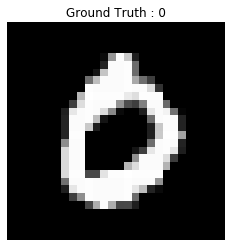

In [93]:
plt.figure(figsize=[10,4])
plt.imshow(x_test[3].reshape(28,28),cmap="gray")
plt.axis(False)
plt.title("Ground Truth : {}".format(y_test[3]))
plt.show()

In [94]:
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape  : ', x_test.shape, y_test.shape)
single_feature=x_test.shape[1]*x_test.shape[2]

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape  :  (10000, 28, 28) (10000,)


In [95]:
classes = np.unique(y_train)
nClasses = len(classes)
img_rows, img_cols = 28, 28

print('Total number of outputs : ', nClasses)
print('Output classes          : ', classes)

Total number of outputs :  10
Output classes          :  [0 1 2 3 4 5 6 7 8 9]


In [96]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [97]:
x_train.shape

(60000, 28, 28, 1)

In [98]:
y_train = keras.utils.to_categorical(y_train, nClasses)
y_test = keras.utils.to_categorical(y_test, nClasses)

In [100]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32,(4,4),padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nClasses, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_57 (Dropout)         (None, 512)               0         
__________

In [101]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, 
                            batch_size=512, epochs=30, verbose=1, 
                            validation_data=(x_test, y_test))

W0824 13:34:43.991303 140618988136192 deprecation.py:323] From /home/anon/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 32s 530us/step - loss: 0.4215 - acc: 0.8712 - val_loss: 0.0798 - val_acc: 0.9750
Epoch 2/30
60000/60000 [==============================] - 31s 509us/step - loss: 0.0798 - acc: 0.9748 - val_loss: 0.0482 - val_acc: 0.9840
Epoch 3/30
60000/60000 [==============================] - 28s 470us/step - loss: 0.0506 - acc: 0.9840 - val_loss: 0.0369 - val_acc: 0.9878
Epoch 4/30
60000/60000 [==============================] - 42s 696us/step - loss: 0.0386 - acc: 0.9880 - val_loss: 0.0341 - val_acc: 0.9879
Epoch 5/30
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0327 - acc: 0.9897 - val_loss: 0.0394 - val_acc: 0.9869
Epoch 6/30
60000/60000 [==============================] - 44s 726us/step - loss: 0.0285 - acc: 0.9913 - val_loss: 0.0305 - val_acc: 0.9905
Epoch 7/30
60000/60000 [==============================] - 43s 716us/step - loss: 0.0234 - acc: 0.9927 - val_loss: 0.03

In [106]:
model.predict_classes(x_test[3].reshape(-1,28,28,1))

array([0])

In [107]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])
model.save('mycnn_model.h5')


 Test accuracy: 0.99


In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [2]:
model_l = load_model('mycnn_model.h5')

W0831 17:50:42.144032 140311424661248 deprecation_wrapper.py:119] From /home/anon/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0831 17:50:42.159077 140311424661248 deprecation_wrapper.py:119] From /home/anon/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0831 17:50:42.194297 140311424661248 deprecation_wrapper.py:119] From /home/anon/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0831 17:50:42.253337 140311424661248 deprecation_wrapper.py:119] From /home/anon/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0831 17:50:42.254021 1403

In [3]:
import cv2

In [4]:
y = 150
h = 300
x = 150
w = 300
font = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (272,480)
fontScale = 1
fontColor = (255,255,255)
lineType = 2
dim = (28, 28)

In [5]:
cap = cv2.VideoCapture(0)
cap.set(3,1200)
cap.set(4,700)
while(True):
    ret, frame = cap.read()
    cv2.rectangle(frame,(150,150),(450,450),(211,211,211),2)
    crop_img = frame[y:y+h, x:x+w]
    gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
    (thresh, gray1) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    gray1 = cv2.resize(255-gray1, (28, 28))
    n=gray1.reshape(-1,28,28,1).astype('float32')/255
    m=model_l.predict_classes(n)
    cv2.putText(frame,str(m),bottomLeftCornerOfText, font, fontScale, fontColor, lineType)
    cv2.imshow('Crop',gray1)
    cv2.imshow('Full Video',frame)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()